In [2]:
import numpy as np
import pandas as pd

In [3]:
rs=pd.read_csv("ratings_Electronics.csv",names=['userId', 'productId','ratings','timestamp' ])
rs.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
rs=rs.drop("timestamp",axis=1)
rs.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [16]:
len(rs)

7824482

In [28]:
rs1=rs.head(10000)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

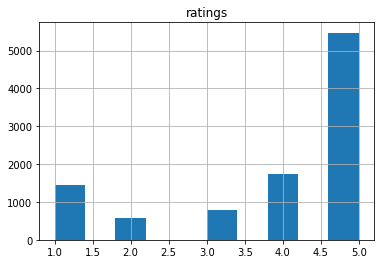

In [29]:
hist=rs1.hist()

In [19]:
rs1.dtypes

userId        object
productId     object
ratings      float64
dtype: object

In [30]:
rs1.shape

(10000, 3)

In [21]:
rs1.isna().sum()

userId       0
productId    0
ratings      0
dtype: int64

In [22]:
rs1.isnull().sum()

userId       0
productId    0
ratings      0
dtype: int64

In [23]:
rs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
userId       1000 non-null object
productId    1000 non-null object
ratings      1000 non-null float64
dtypes: float64(1), object(2)
memory usage: 23.5+ KB


In [31]:
rs1.describe()

,ratings
count,10000.000000
mean,3.920000
std,1.467384
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [32]:
rs1_grouped=rs1.groupby(['productId']).agg({'ratings':'count'}).reset_index()

In [33]:
rs1_gs=rs1_grouped['ratings'].sum()

In [34]:
print(rs1_gs)

10000


In [37]:
rs1_grouped['percentage']=rs1_grouped['ratings'].div(rs1_gs)*100

In [39]:
rs1_grouped.sort_values(['ratings','productId'],ascending=[0,1])

,productId,ratings,percentage
38,0972683275,1051,10.51
60,1400532655,484,4.84
61,140053271X,431,4.31
1229,B00000DM9W,332,3.32
1258,B00000J061,262,2.62
53,1400501466,250,2.50
63,1400599997,222,2.22
291,9573212919,199,1.99
1219,B000001ON6,185,1.85
711,9983891212,174,1.74


In [41]:
users=rs['userId'].unique()
len(users)

4201696

In [51]:
product=rs['productId'].unique()
len([product])

1

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
train_data,test_data=train_test_split(rs,test_size=0.20,random_state=0)

### Popularity Recommender model.

In [45]:
import Recommenders as Recommenders
import Evaluation as Evaluation

In [46]:
pm=Recommenders.popularity_recommender_py()

In [48]:
pm.create(train_data,'userId','productId')

In [49]:
user_id=users[20]

In [50]:
pm.recommend(user_id)

,userId,productId,score,Rank
285236,A37K02NKUIT68K,B0074BW614,14642,1.0
395341,A37K02NKUIT68K,B00DR0PDNE,13139,2.0
302531,A37K02NKUIT68K,B007WTAJTO,11383,3.0
95915,A37K02NKUIT68K,B0019EHU8G,9786,4.0
274350,A37K02NKUIT68K,B006GWO5WK,9770,5.0
166206,A37K02NKUIT68K,B003ELYQGG,9332,6.0
166395,A37K02NKUIT68K,B003ES5ZUU,8195,7.0
298590,A37K02NKUIT68K,B007R5YDYA,7940,8.0
268059,A37K02NKUIT68K,B00622AG6S,7811,9.0
28325,A37K02NKUIT68K,B0002L5R78,7591,10.0


In [53]:
user_id=users[7]

In [54]:
pm.recommend(user_id)

,userId,productId,score,Rank
285236,A2TY0BTJOTENPG,B0074BW614,14642,1.0
395341,A2TY0BTJOTENPG,B00DR0PDNE,13139,2.0
302531,A2TY0BTJOTENPG,B007WTAJTO,11383,3.0
95915,A2TY0BTJOTENPG,B0019EHU8G,9786,4.0
274350,A2TY0BTJOTENPG,B006GWO5WK,9770,5.0
166206,A2TY0BTJOTENPG,B003ELYQGG,9332,6.0
166395,A2TY0BTJOTENPG,B003ES5ZUU,8195,7.0
298590,A2TY0BTJOTENPG,B007R5YDYA,7940,8.0
268059,A2TY0BTJOTENPG,B00622AG6S,7811,9.0
28325,A2TY0BTJOTENPG,B0002L5R78,7591,10.0


### Collaborative Filtering model

In [68]:
from surprise import Dataset,Reader

ModuleNotFoundError: No module named 'surprise'

In [66]:
Reader=Reader(rating_scale=(1,5))

NameError: name 'Reader' is not defined